In [0]:
import numpy as np
import keras
from keras.layers import Dense, Activation, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU, Input, Reshape, Conv2DTranspose
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import Sequential, Model, load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from tqdm import tqdm_notebook
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
adam = Adam(lr=0.0002, beta_1=0.5)

In [12]:
try:
    generator = load_model('gen.h5')
except:
    generator = Sequential()
    generator.add(Dense(784, input_dim=10))
    generator.add(LeakyReLU(0.2))
    generator.add(Reshape((7,7,16)))
    generator.add(Conv2DTranspose(128,(3,3),strides=2,activation='relu',padding='same'))
    generator.add(Conv2DTranspose(512,(3,3),strides=2,activation='relu',padding='same'))
    generator.add(Conv2D(1,(3,3),strides=1,activation='relu',padding='same'))
    generator.add(Activation('tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               8624      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 784)               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 14, 14, 128)       18560     
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 28, 28, 512)       590336    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         4609      
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 1)         0         
Total para

In [0]:
def plot_generated(figsize=(12, 2)):
    noise = y_train[np.random.randint(0, y_train.shape[0], size=10)]
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(10, 28, 28)
#     generated_images += 1
    generated_images *=255
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(1, 10, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.title(np.argmax(noise[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()



In [14]:
y_train = np_utils.to_categorical(y_train)

X_train = X_train.astype('float64')
X_train /= 255
X_test = X_test.astype('float64')
X_test /= 255

#y_train = y_train.reshape((len(y_train),10))

X_train = X_train.reshape(len(X_train),28,28,1)

(y_train.shape,X_train.shape)

((60000, 10), (60000, 28, 28, 1))

Epoch 1/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2225
Epoch 2/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2221
Epoch 3/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2214


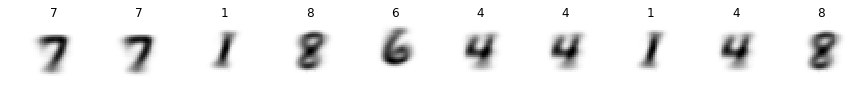

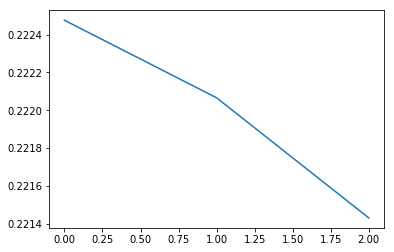

In [16]:
history = generator.fit(y_train,X_train,verbose=1,batch_size=128,epochs=3)
plot_generated()

plt.plot(history.history['loss'])

In [0]:
generator.save('gen.h5')